# Extreme Gradient Boost


### Initialization

In [24]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

filename = "encoded_data_04_12.csv"
df = pd.read_csv(f"../DataSets/EncodedData/{filename}", sep=",", encoding="UTF-8")
df.head()

,name,height_in_cm,year,goals_for,goals_against,goals,assists,red_cards,yellow_cards,minutes_played,market_value_in_eur,age_at_evaluation,log_market_value_base10,country_of_citizenship_encoded,sub_position_encoded,club_id_encoded,domestic_competition_id_encoded
0,Miroslav Klose,184.0,2012.75,31.0,14.0,11.0,1.0,0.0,6.0,1483.0,4000000.0,35,6.60206,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06
1,Miroslav Klose,184.0,2013.25,24.0,15.0,5.0,2.0,0.0,2.0,1102.0,2000000.0,35,6.30103,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06
2,Miroslav Klose,184.0,2013.75,14.0,21.0,4.0,2.0,0.0,1.0,950.0,1000000.0,36,6.00000,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06
3,Miroslav Klose,184.0,2014.25,24.0,22.0,4.0,3.0,0.0,1.0,1270.0,1000000.0,36,6.00000,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06
4,Miroslav Klose,184.0,2014.75,31.0,18.0,4.0,3.0,0.0,2.0,496.0,1000000.0,37,6.00000,7.191504e+06,5.331868e+06,7.836111e+06,7.182738e+06


### Training and Prediction

In [25]:
X = df.drop(columns=['log_market_value_base10', 'name', 'market_value_in_eur'])
y = df['log_market_value_base10']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

model = XGBRegressor(n_estimators=100, max_depth=8, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

        height_in_cm     year  goals_for  goals_against  goals  assists  \
98661          185.0  2020.75       25.0           29.0    0.0      0.0   
89472          189.0  2022.25       27.0           21.0    0.0      1.0   
115706         175.0  2022.25        1.0            4.0    0.0      0.0   
49287          195.0  2018.25       16.0           22.0    0.0      0.0   
7423           189.0  2019.25       17.0           24.0    0.0      4.0   
...              ...      ...        ...            ...    ...      ...   
57471          182.0  2016.75        8.0            6.0    0.0      0.0   
90516          185.0  2018.25       19.0           20.0    4.0      1.0   
118598         169.0  2020.75        0.0            4.0    0.0      0.0   
110809         183.0  2018.75        8.0            4.0    0.0      0.0   
13619          185.0  2015.75        7.0            9.0    0.0      0.0   

        red_cards  yellow_cards  minutes_played  age_at_evaluation  \
98661         0.0           3

In [96]:

z = pd.merge(X_test, df, on=['height_in_cm','year','goals_for','goals_against','goals','assists','red_cards','yellow_cards','minutes_played','age_at_evaluation','country_of_citizenship_encoded','sub_position_encoded','club_id_encoded','domestic_competition_id_encoded'])
z.set_index(X_test.index, inplace=True)
z['Predicted_Value_log'] = y_pred
z['Predicted_Value'] = np.power(10, y_pred)

results = z[['name', 'year', 'market_value_in_eur', 'Predicted_Value', 'log_market_value_base10', 'Predicted_Value_log']]
results.sort_values(by='Predicted_Value', ascending=False)



,name,year,market_value_in_eur,Predicted_Value,log_market_value_base10,Predicted_Value_log
115380,Jude Bellingham,2023.75,180000000.0,2.863089e+08,8.255273,8.456835
20395,Luis Suárez,2018.25,70000000.0,1.431931e+08,7.845098,8.155922
34793,Neymar,2017.75,180000000.0,1.269069e+08,8.255273,8.103485
3182,Cristiano Ronaldo,2013.25,100000000.0,1.147371e+08,8.000000,8.059704
56905,Raheem Sterling,2020.75,110000000.0,1.143460e+08,8.041393,8.058221
...,...,...,...,...,...,...
36039,Khasan Mamtov,2020.75,50000.0,4.381762e+04,4.698970,4.641649
63325,Craig Storie,2013.75,50000.0,4.144173e+04,4.698970,4.617438
7623,Oleksandr Rybka,2023.75,100000.0,4.132123e+04,5.000000,4.616173
117726,Konstantinos Nikolopoulos,2020.75,50000.0,3.524637e+04,4.698970,4.547114


### Model Performance

In [97]:
# Reverse normalization for actual values
y_test_original = np.power(10, y_test)

# Reverse normalization for predicted values
y_pred_original = np.power(10, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test_original, y_pred_original)
print(f'Mean Squared Error: {mse}')

# Calculate the mean squared percentage error
percentage_error = (mse / y_test_original.mean()) * 100
print(f'Mean squared Percentage Error: {percentage_error}%')


from sklearn.metrics import mean_absolute_percentage_error
result = mean_absolute_percentage_error(y_pred=y_pred_original, y_true=y_test_original)
print("Mean Absolute Percentage Error: ", result)

Mean Squared Error: 22799083980480.94
Mean squared Percentage Error: 484322483.2798062%
Mean Absolute Percentage Error:  0.5040317541005923


Cristiano Ronaldo
Mohamed Salah
Jude Bellingham
Marcus Rashford
Neymar
Raheem Sterling
Romelu Lukaku
Erling Haaland
Luis Suárez
Lautaro Martínez


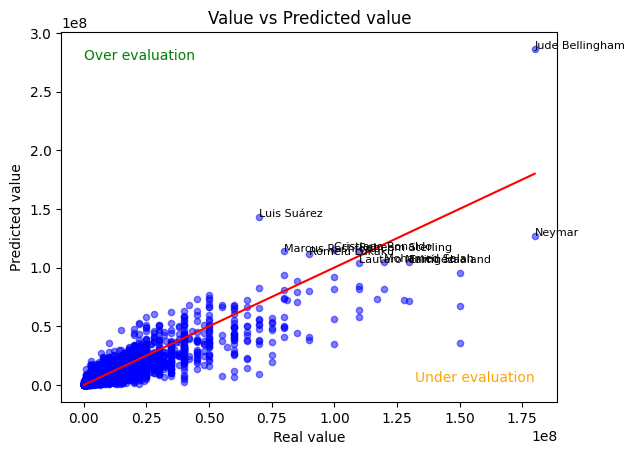

In [100]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_test_original, y_pred_original, s=20, color='blue', alpha=0.5)  # Set dot size to 20, blue color, and transparency to 0.5
plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.title("Value vs Predicted value")

# Add diagonal line
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red')
plt.text(min(y_test_original), max(y_pred_original), "Over evaluation", fontsize=10, color='green', verticalalignment='top', horizontalalignment='left')
plt.text(max(y_test_original), min(y_pred_original), "Under evaluation", fontsize=10, color='orange', verticalalignment='bottom', horizontalalignment='right')

# Add player names for values over 50 million
for index, row in z.iterrows():
    if row['Predicted_Value'] > 100000000:  # Assuming the value is in EUR
        print(row['name'])
        plt.annotate(row['name'], (row['market_value_in_eur'], row['Predicted_Value']), fontsize=4, color='black')


plt.show()


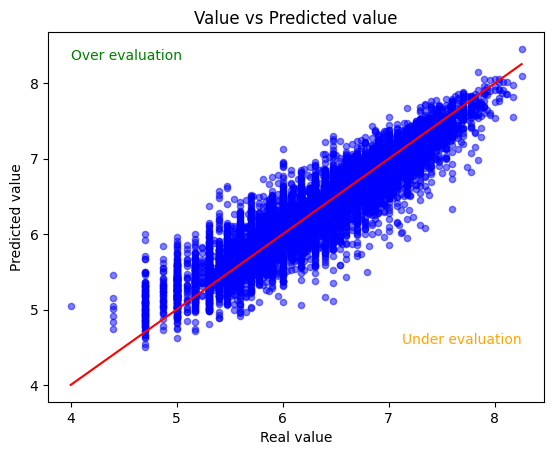

In [82]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_test, y_pred, s=20, color='blue', alpha=0.5)  # Set dot size to 20, blue color, and transparency to 0.5
plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.title("Value vs Predicted value")

# Add diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.text(min(y_test), max(y_pred), "Over evaluation", fontsize=10, color='green', verticalalignment='top', horizontalalignment='left')
plt.text(max(y_test), min(y_pred), "Under evaluation", fontsize=10, color='orange', verticalalignment='bottom', horizontalalignment='right')

plt.show()
